# Navigating the Digital World Week 3 - Alternate JupyterLab Analysis

## Import Python Libraries

In [25]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

## Import Dataset

In [26]:
data = pd.read_csv('data.csv',sep=';')
print(data.dtypes)

Age        int64
Area       int64
Quality    int64
Price      int64
dtype: object


In [27]:
price = pd.DataFrame(data['Price'])
price.describe()

,Price
count,100.000000
mean,181010.280000
std,81946.369156
min,34900.000000
25%,126750.000000
50%,163450.000000
75%,210000.000000
max,440000.000000


In [28]:
quality = pd.DataFrame(data['Quality'])
quality.describe()

,Quality
count,100.000000
mean,6.100000
std,1.466804
min,3.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,10.000000


In [29]:
area = pd.DataFrame(data['Area'])
area.describe()

,Area
count,100.000000
mean,1508.790000
std,493.845993
min,630.000000
25%,1134.750000
50%,1474.000000
75%,1759.000000
max,3228.000000


In [30]:
age = pd.DataFrame(data['Age'])
age.describe()

,Age
count,100.000000
mean,38.650000
std,30.271958
min,0.000000
25%,9.500000
50%,38.000000
75%,59.250000
max,106.000000


<AxesSubplot:ylabel='Count'>

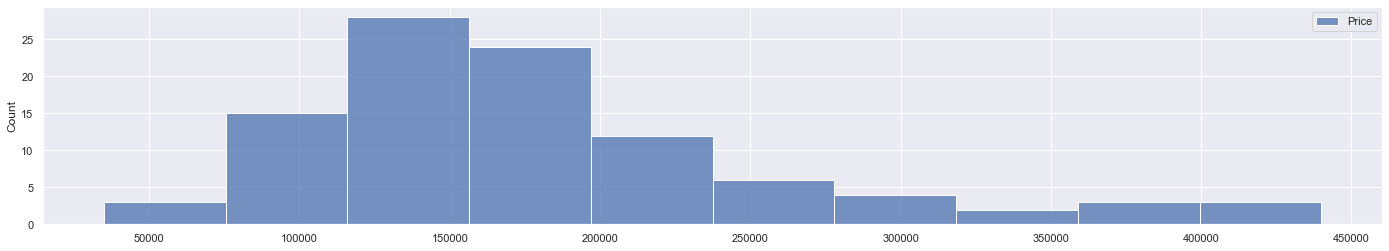

In [33]:
f = plt.figure(figsize=(24,4))
sb.histplot(data = price,bins=10)

<AxesSubplot:ylabel='Count'>

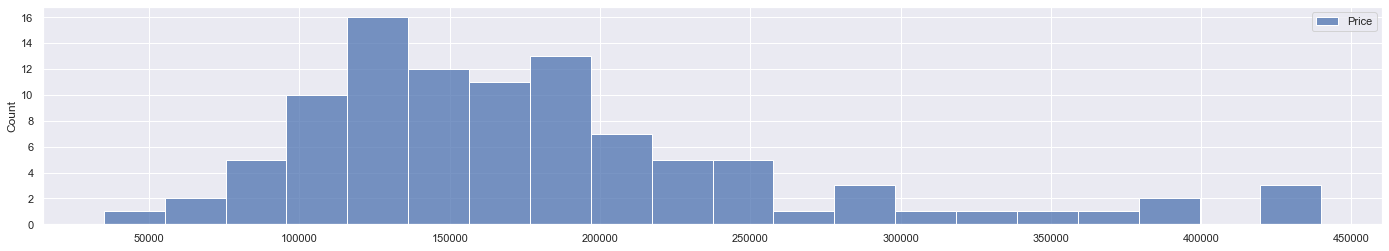

In [34]:
f = plt.figure(figsize=(24,4))
sb.histplot(data = price,bins=20)

<AxesSubplot:ylabel='Count'>

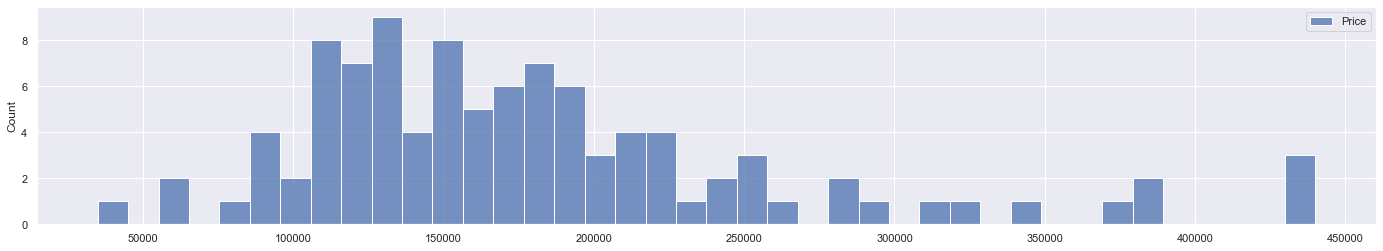

In [35]:
f = plt.figure(figsize=(24,4))
sb.histplot(data = price,bins=40)

In [38]:
jointDF = pd.concat([price,age,quality,area],axis=1).reindex(price.index)
jointDF

,Price,Age,Quality,Area
0,34900,89,4,720
1,60000,51,5,1276
2,62383,44,5,864
3,80000,65,4,747
4,86000,39,4,630
...,...,...,...,...
95,380000,1,9,2643
96,385000,25,9,1842
97,430000,15,8,3228
98,438780,0,10,2945


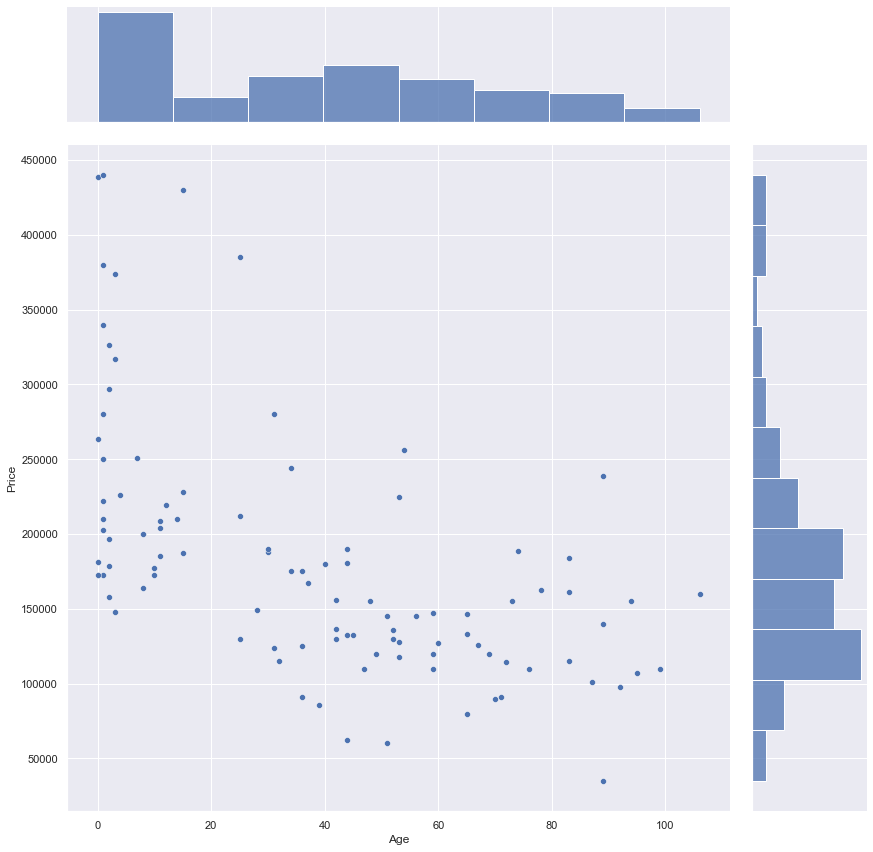

In [37]:
sb.jointplot(data = jointDF, x = "Age", y = "Price", height = 12)

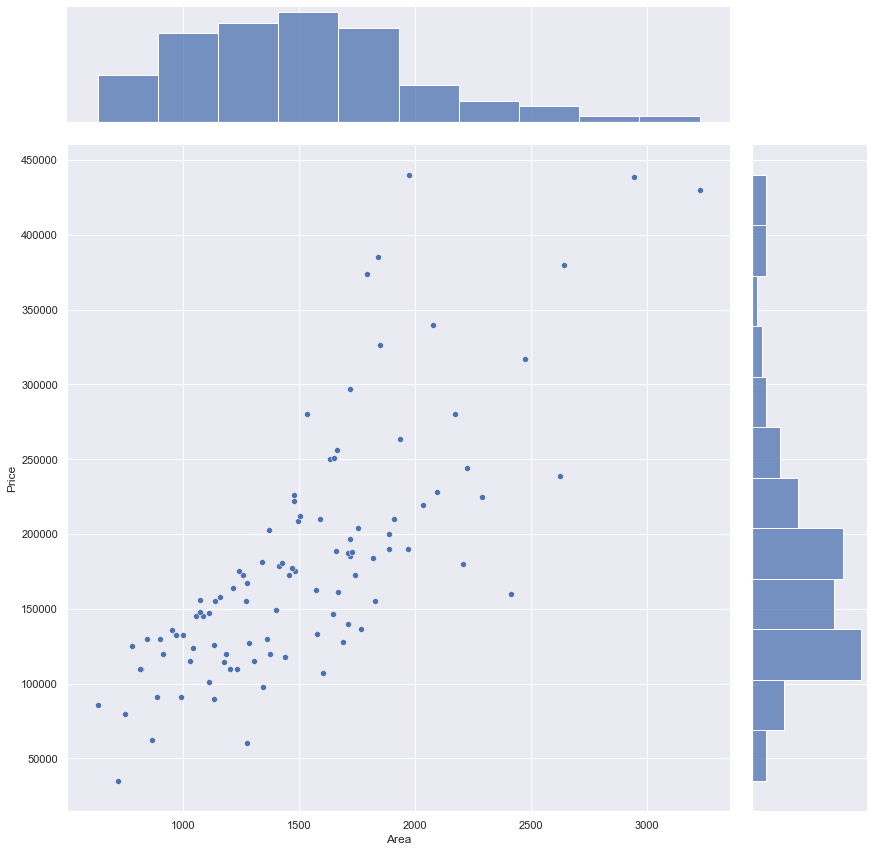

In [39]:
sb.jointplot(data = jointDF, x = "Area", y = "Price", height = 12)

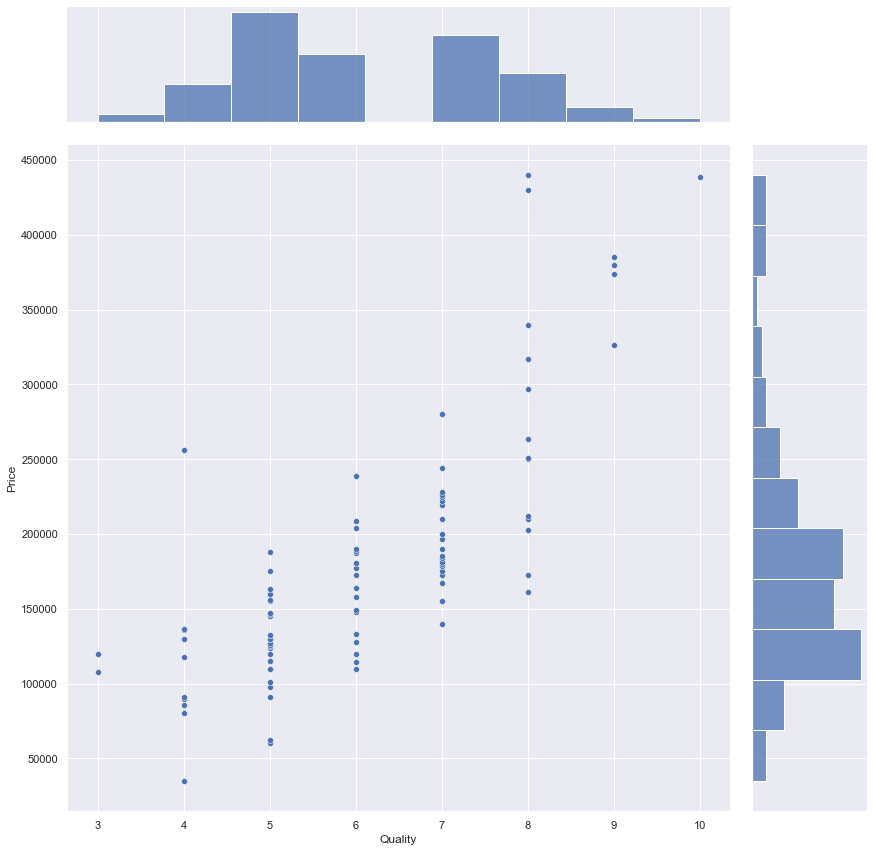

In [40]:
sb.jointplot(data = jointDF, x = "Quality", y = "Price", height = 12)

In [41]:
jointDF.corr()

,Price,Age,Quality,Area
Price,1.000000,-0.580266,0.784122,0.760177
Age,-0.580266,1.000000,-0.568370,-0.271194
Quality,0.784122,-0.568370,1.000000,0.626316
Area,0.760177,-0.271194,0.626316,1.000000


<AxesSubplot:>

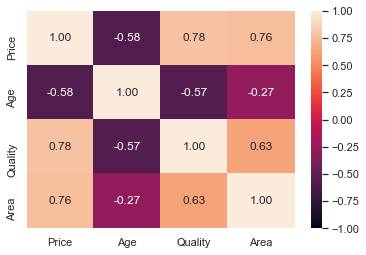

In [42]:
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [47]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Create a Linear Regression object
linreg = LinearRegression()

In [48]:
linreg.fit(price, age)

LinearRegression()

In [50]:
print(linreg.intercept_)
print(linreg.coef_)

[77.45086423]
[[-0.00021436]]
